<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2020 </h1>

<H3 align='center'> Tarea 2 - Redes Neuronales Convolucionales y Recurrentes </H3>
<hr style="height:2px;border:none"/>

* Equipo: JPerceptron
* Integrantes:
  * Gabriel Astorga
  * Rigoberto Bravo
  * Juan Pablo 
  

#### <a id="segundo"></a>
## 2.Challenge Kaggle


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
 !wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: es-ES,es;q=0.9,es-CL;q=0.8,en;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/21163/1249260/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1594594095&Signature=SI3odlxq6KqD7ILgBFYaw3zrPSyoGqFZeFxCLOH6gVJgBqRFBvgNCr3nvtREGgYYC439acS2j3pmz%2FziViHH6STE%2BrETISC0Jc22Lc%2F3Bo1cnOZ%2BXIBIap5frkEyVWjKcTliDnuHELnrFweP3i6rA4HP9KZvuwmXAf7CcptyXLasevuIISsElhGTpR%2F07IE51X88CTQo1yB7MLRCaEFu5HlzKO%2FHQrUFkPGm6qbamSUGfv7An5ct4Sb3qFIHDr7EPZybWWkzJoHCRd30lwD0OgPlfWnqBUGWV5EzbPXjIxKFTv933D0J2XtXMxIvtfWkLScMmVtSSw6PjM1hnoShnw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtaller2ann-usm.zip" -c -O 'taller2ann-usm.zip'

--2020-07-10 05:53:40--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/21163/1249260/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1594594095&Signature=SI3odlxq6KqD7ILgBFYaw3zrPSyoGqFZeFxCLOH6gVJgBqRFBvgNCr3nvtREGgYYC439acS2j3pmz%2FziViHH6STE%2BrETISC0Jc22Lc%2F3Bo1cnOZ%2BXIBIap5frkEyVWjKcTliDnuHELnrFweP3i6rA4HP9KZvuwmXAf7CcptyXLasevuIISsElhGTpR%2F07IE51X88CTQo1yB7MLRCaEFu5HlzKO%2FHQrUFkPGm6qbamSUGfv7An5ct4Sb3qFIHDr7EPZybWWkzJoHCRd30lwD0OgPlfWnqBUGWV5EzbPXjIxKFTv933D0J2XtXMxIvtfWkLScMmVtSSw6PjM1hnoShnw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtaller2ann-usm.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11279479 (11M) [application/zip]
Saving to: ‘taller2ann-usm.zip’

taller2ann-usm.zip  10

In [ ]:
%%time 
!mkdir taller2_data
# zip_path= '/content/drive/My Drive/Colab Notebooks/taller2ann-usm.zip'
zip_path= '/content/taller2ann-usm.zip'
!cp "{zip_path}" .
!unzip -q taller2ann-usm.zip -d taller2_data/
!rm taller2ann-usm.zip

cp: '/content/taller2ann-usm.zip' and './taller2ann-usm.zip' are the same file
CPU times: user 29.5 ms, sys: 15.4 ms, total: 45 ms
Wall time: 5.57 s


In [ ]:
import os
import pandas as pd
from os.path import join
from os import listdir

# Import data
root_path = '/content/taller2_data'
# Train tweets
path_train_tweets = join(root_path, 'train_source_tweets.txt')
df_train_tweets = pd.read_csv(path_train_tweets, sep='\t', header=None)
df_train_tweets.columns = ['id', 'tweet']
labels_train = pd.read_csv(join(root_path, 'train_labels.csv'))
# Merge labels and tweets
df_train_tweets = pd.merge(df_train_tweets, labels_train, on='id', how='inner')
#Test tweets
path_test_tweets = join(root_path, 'test_source_tweets.txt')
df_test_tweets = pd.read_csv(path_test_tweets, sep='\t', header=None)
df_test_tweets.columns = ['id', 'tweet']

In [ ]:
import nltk
# Downloads nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import unicodedata
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Remove accents function
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")
print(stopwords.words('english'))
stopwords = stopwords.words('english')
other_stop_words = ['$', '"', '!', '%', '?', '@', '#', '¿', '(', ')', '=', '&',
                    '/', '´', '¡', '[]','-', '+', '*', '\'s', ':', ';', ',','.',
                    '[', ']', '{', '}', '_', '<', '>', '·', '|', 'ç']
stopwords += other_stop_words
lemmatizer = WordNetLemmatizer()

def clear_text(df):
  tweets = []
  for t in df['tweet']:
    clear_sentence = ''
    tokens = word_tokenize(t)
    for token in tokens:
      word = token.lower()
      word = remove_accents(word)
      if word not in stopwords and len(word) > 2:
        word = lemmatizer.lemmatize(word)
        clear_sentence += ' ' + word
    tweets.append(clear_sentence)
  return tweets
train_tweets = clear_text(df_train_tweets)
test_tweets = clear_text(df_test_tweets)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_tweets)
vocab_size = len(tokenizer.word_index) + 1
X_train = tokenizer.texts_to_sequences(train_tweets)
X_test = tokenizer.texts_to_sequences(test_tweets)
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

classes = df_train_tweets.label.unique()
n_classes = len(classes)
labels = {}
count = 0
for l in classes:
  labels[l] = count
  count+=1
y_train = np.array(df_train_tweets.label.replace(labels).tolist())
y_train = to_categorical(y_train, n_classes)

[[225, 497, 1519, 1520, 2274, 720, 40, 2, 1521, 2275, 1522, 592, 283, 1], [226, 498, 593, 426, 3, 49, 110, 51, 284, 1, 1], [15, 168, 2276, 2277, 1523, 890, 1112, 15, 111, 499, 427, 1], [285, 1113, 1524, 1525, 721, 500, 2278, 73, 2279, 2280, 1, 1], [2281, 2282, 722, 891, 325, 594, 428, 14, 595, 501, 21, 119, 14, 77, 1], [1526, 83, 201, 169, 86, 250, 286, 723, 429, 502, 1, 35, 2283, 2284], [5, 4, 134, 892, 1527, 6, 153, 154, 68, 46, 503, 170, 1], [2285, 38, 171, 430, 385, 431, 15, 1, 1], [1114, 1115, 893, 172, 1116, 18, 1117, 3, 1, 1], [30, 2286, 135, 504, 505, 227, 506, 1118, 1528, 2287, 14, 1], [7, 596, 326, 173, 287, 1119, 1529, 1120, 2288, 1, 35, 2289], [64, 5, 4, 136, 55, 2290, 327, 1530, 894, 170, 1, 1], [597, 202, 228, 6, 1, 1], [1121, 155, 106, 3, 386, 1531, 724, 1], [2291, 895, 896, 203, 288, 156, 1122, 15, 1, 1], [1532, 328, 2, 251, 1533, 725, 252, 329, 1, 330, 1], [507, 897, 598, 52, 1], [1534, 2292, 120, 1123, 898, 899, 137, 900, 2293, 1, 1], [1124, 7, 508, 1125, 599, 23, 599

## Import Glove Embedding 


Se importa un embedding de 200d con 27 billones de palabras, preentrenado con Glove en un dataset de twitter

In [ ]:
!wget --header="Host: downloads.cs.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: es-ES,es;q=0.9,es-CL;q=0.8,en;q=0.7" --header="Cookie: _ga=GA1.2.168173633.1594006722; _gid=GA1.2.4067726.1594335091; _gat=1" --header="Connection: keep-alive" "http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.twitter.27B.zip" -c -O 'glove.twitter.27B.zip'

--2020-07-09 23:08:54--  http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408741 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  1.91MB/s    in 11m 43s 

2020-07-09 23:20:37 (2.06 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408741/1520408741]



In [ ]:
zip_path= '/content/glove.twitter.27B.zip'
!cp "{zip_path}" .
!unzip -q glove.twitter.27B.zip -d taller2_data/

cp: '/content/glove.twitter.27B.zip' and './glove.twitter.27B.zip' are the same file


In [ ]:
# Import tensor representations for words
embeddings_index = {};
with open('/content/taller2_data/glove.twitter.27B.200d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;
print(len(coefs))

embeddings_matrix = np.zeros((vocab_size, 200));
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

200


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 200)          974000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 96, 128)           128128    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 44        
Total params: 1,103,462
Trainable params: 1,103,462
Non-trainable params: 0
_________________________________________________________________


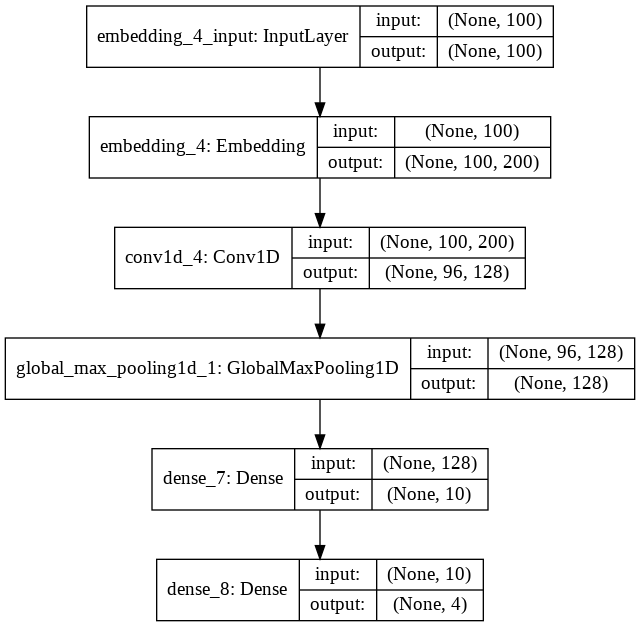

In [ ]:
import keras
from keras.models import Sequential
from keras import layers
import math
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

embedding_dim = 200
model = Sequential()
model.add(layers.Embedding(vocab_size,
                           embedding_dim,
                           #weights=[embeddings_matrix], # se importan los pesos
                           trainable=True,
                           input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(n_classes, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Train model
checkpoint = ModelCheckpoint(filepath='final_model.h5', 
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]

model.fit(X_train, y_train, verbose=1, epochs=50, validation_split=0.2, callbacks=callbacks)

Train on 1540 samples, validate on 386 samples
Epoch 1/100
1540/1540 [==============================] - 1s 388us/step - loss: 0.0669 - accuracy: 0.9825 - val_loss: 0.7364 - val_accuracy: 0.8057

Epoch 00001: val_accuracy improved from -inf to 0.80570, saving model to final_model.h5
Epoch 2/100
1540/1540 [==============================] - 1s 380us/step - loss: 0.0424 - accuracy: 0.9883 - val_loss: 0.7671 - val_accuracy: 0.7876

Epoch 00002: val_accuracy did not improve from 0.80570
Epoch 3/100
1540/1540 [==============================] - 1s 383us/step - loss: 0.0496 - accuracy: 0.9864 - val_loss: 0.7943 - val_accuracy: 0.7746

Epoch 00003: val_accuracy did not improve from 0.80570
Epoch 4/100
1540/1540 [==============================] - 1s 384us/step - loss: 0.0579 - accuracy: 0.9786 - val_loss: 0.7950 - val_accuracy: 0.7902

Epoch 00004: val_accuracy did not improve from 0.80570
Epoch 5/100
1540/1540 [==============================] - 1s 372us/step - loss: 0.0423 - accuracy: 0.9883 - v

In [ ]:
import keras
keras.backend.clear_session()

## Process Graph

In [ ]:
graphs_path = join(root_path, 'train')
files_graphs = listdir(graphs_path)
id_files = [int(i.replace('.txt', '')) for i in files_graphs]
df = pd.DataFrame({'id': id_files})
df = pd.merge(df, df_train_tweets, on='id', how='inner')
# y_train = np.array(df.label.replace(labels).tolist())
# y_train = to_categorical(y, n_classes)
df.set_index('id', inplace=True)

train_tweets = clear_text(df)


import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_tweets)
vocab_size = len(tokenizer.word_index) + 1
X_train = tokenizer.texts_to_sequences(train_tweets)
X_test = tokenizer.texts_to_sequences(test_tweets)
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

classes = df_train_tweets.label.unique()
n_classes = len(classes)
labels = {}
count = 0
for l in classes:
  labels[l] = count
  count+=1
y_train = np.array(df.label.replace(labels).tolist())
y_train = to_categorical(y_train, n_classes)

In [ ]:
!pip install karateclub

     |████████████████████████████████| 1.8MB 10.4MB/s 
  Created wheel for karateclub: filename=karateclub-1.0.8-cp36-none-any.whl size=68247 sha256=a7cba8624c3d7da63c4e4901408d9795433bbb9f0c0a095b57a4c9950dc16a98
  Stored in directory: /root/.cache/pip/wheels/ca/3f/9d/66570dca5a24589f58b851c1fdbc432a65a300103f8e214c11
Successfully built karateclub


In [ ]:
import json
import networkx
import os
from os.path import join
from os import listdir
from networkx.readwrite.edgelist import read_edgelist
from karateclub import DeepWalk

dir_graph2vec = '/content/graph2vec'
graphs_path = join(root_path, 'train')
global_graph = join(root_path,'edges.txt')

def get_graphs(graphs_path, dir_graph2vec, train=True):
  sequences = []
  if not os.path.isdir(dir_graph2vec):
    os.mkdir(dir_graph2vec)

  files_graphs = listdir(graphs_path)

  graphs_networkx = []

  file_global_graph = open(global_graph, "w")

  for f in files_graphs:
    sequence = []
    id = int(f.replace('.txt', ''))
    if train:
      label = df.loc[id, 'label']
    name_file = join(dir_graph2vec, f)
    file_to_write = open(name_file, "w")
    with open(join(graphs_path,f)) as reader:
      nodes = {}
      global_nodes = {}
      index = 0
      global_index = 0
      for line in reader:
        line = line.strip()
        line = line.replace(' ', '')
        line = line.replace("'", '')
        line = line.replace('[', '')
        line = line.replace(']', '')  
        parent, child = line.split('->')
        
        parent = [1.0 if i == 'ROOT' else float(i) for i in  parent.split(',')]
        child = [1.0 if i == 'ROOT' else float(i) for i in  child.split(',')]
        del parent[1]
        del child[1]
        # local graph
        if not parent[0] in nodes.keys():
          nodes[parent[0]] = index
          index += 1
        if not child[0] in nodes.keys():
          nodes[child[0]] = index
          index += 1
        # global graph
        if not parent[0] in global_nodes.keys():
          global_nodes[parent[0]] = global_index
          global_index += 1
        if not child[0] in global_nodes.keys():
          global_nodes[child[0]] = global_index
          global_index +=1  
        #new index of child and parent nodes
        id_parent = nodes[parent[0]]
        id_child = nodes[child[0]]
        
        id_parent_global = global_nodes[parent[0]]
        id_child_global = global_nodes[child[0]]
        # secuencia de aparición de los nodos 
        sequence.append(id_child)
        weight = child[1] - parent[1]
        node_values = json.dumps({'weight': weight})
        data = f'{ id_parent } { id_child } { node_values }\n'
        #data_global = f'{id_parent_global} {id_child_global} {node_values}\n'
        data_global = f'{id_parent} {id_child} {node_values}\n'
        file_to_write.write(data)
        file_global_graph.write(data_global)
      file_to_write.close()
      G = read_edgelist(name_file, nodetype=int)
      graphs_networkx.append(G)
      sequences.append(sequence)
  file_global_graph.close()
  
  G = read_edgelist(global_graph, nodetype=int)
  return graphs_networkx, G, sequences
graphs_networkx, G, sequences_of_nodes = get_graphs(graphs_path, dir_graph2vec)

## Node embedding (DeepWalk) + NLP

In [ ]:
import networkx as nx
from karateclub import DeepWalk

model = DeepWalk()
model.fit(G)
embedding = model.get_embedding()
print(embedding.shape)
maxlen_sequences = 100
X_train_graph = pad_sequences(sequences_of_nodes, padding='post', maxlen=maxlen_sequences)
X_train_graph.shape

(3090, 128)


(1926, 100)

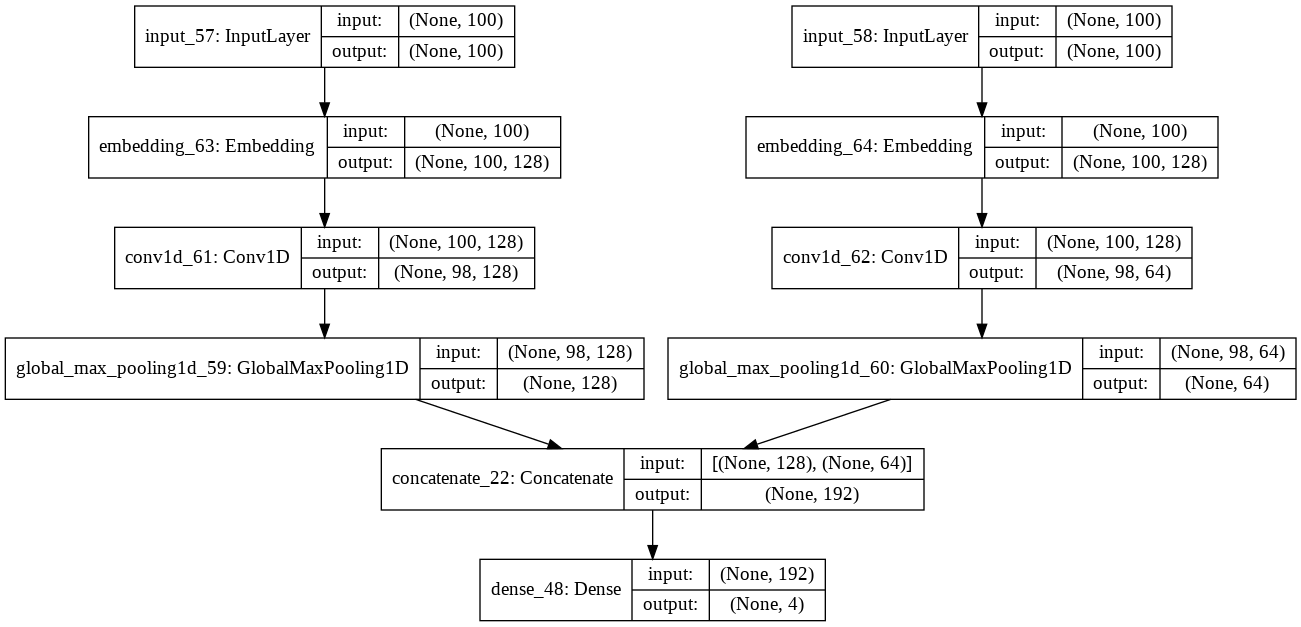

In [ ]:
import keras
from keras.models import Sequential, Model
from keras import layers
import math
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

embedding_dim = 128


embedding_dim = 128
## NLP processing
input_nlp = layers.Input(shape = (maxlen,))
word_embedding_layer = layers.Embedding(vocab_size,
                           embedding_dim,
                           #weights=[embeddings_matrix],
                           #trainable=True,
                           #input_length=maxlen
                           )(input_nlp)
conv_layer = layers.Conv1D(128, 3, activation='tanh')(word_embedding_layer)
maxpooling_layer = layers.GlobalMaxPooling1D()(conv_layer)
# dense_layer = layers.Dense(10, activation='relu')(maxpooling_layer)
##graph processing
input_graph = layers.Input(shape=(maxlen_sequences,))
embedding_node = layers.Embedding(embedding.shape[0],
                           128,
                           weights=[embedding],
                           trainable=True,
                           #input_length=maxlen
                           )(input_graph)
conv_layer_graph = layers.Conv1D(64, 3, activation='tanh')(embedding_node)
maxpooling_layer_graph = layers.GlobalMaxPooling1D()(conv_layer_graph)
# dense2_graph_layer = layers.Dense(10, activation = 'relu')(maxpooling_layer_graph)

add_layers = layers.Concatenate()([maxpooling_layer, maxpooling_layer_graph])
# add_layers = layers.Concatenate()([dense_layer, dense2_graph_layer])

# dense_final = layers.Dense(8, activation = 'tanh')(add_layers)
#dropout = layers.Dropout(0.3)(dense_final)
out_layer = layers.Dense(n_classes, activation='softmax')(add_layers)


model_graph = Model (inputs = [input_nlp, input_graph], outputs = out_layer)
model_graph.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
keras.utils.plot_model(model_graph, show_shapes=True)

In [ ]:
# Train model
checkpoint = ModelCheckpoint(filepath='final_model.h5', 
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]
model_graph.fit([X_train, X_train_graph], y_train, verbose=1, epochs=50, validation_split=0.20, callbacks=callbacks)
# model_graph.fit(X_train_graph, y_train, verbose=1, epochs=50, validation_split=0.2, callbacks=callbacks)

Train on 1540 samples, validate on 386 samples
Epoch 1/50
1540/1540 [==============================] - 1s 833us/step - loss: 1.2278 - accuracy: 0.4344 - val_loss: 1.1596 - val_accuracy: 0.4534

Epoch 00001: val_accuracy improved from -inf to 0.45337, saving model to final_model.h5
Epoch 2/50
1540/1540 [==============================] - 0s 214us/step - loss: 0.9074 - accuracy: 0.6864 - val_loss: 0.8185 - val_accuracy: 0.7254

Epoch 00002: val_accuracy improved from 0.45337 to 0.72539, saving model to final_model.h5
Epoch 3/50
1540/1540 [==============================] - 0s 209us/step - loss: 0.4152 - accuracy: 0.9065 - val_loss: 0.5111 - val_accuracy: 0.8368

Epoch 00003: val_accuracy improved from 0.72539 to 0.83679, saving model to final_model.h5
Epoch 4/50
1540/1540 [==============================] - 0s 214us/step - loss: 0.1181 - accuracy: 0.9890 - val_loss: 0.4349 - val_accuracy: 0.8731

Epoch 00004: val_accuracy improved from 0.83679 to 0.87306, saving model to final_model.h5
Epoc

## Graph2Vec + NLP

In [ ]:
from karateclub import Graph2Vec

print(graphs_networkx[0].edges.data('weight'))
graph2vec = Graph2Vec(wl_iterations=2,
                      attributed=False,
                      dimensions=128,
                      workers=8,
                      down_sampling=0.001,
                      epochs=10,
                      learning_rate=0.01,
                      min_count=5,
                       seed=0)
emmbeding = graph2vec.fit(graphs_networkx)

[(0, 1, 0.0), (1, 2, 0.5), (1, 3, 0.57), (1, 4, 0.68), (1, 5, 1.25), (1, 6, 1.4), (1, 7, 1.76), (1, 8, 1.94), (1, 9, 2.12), (1, 10, 2.17), (1, 11, 3.02), (1, 12, 3.05), (1, 13, 3.27), (1, 14, 5.23), (1, 15, 5.27), (1, 16, 6.01), (1, 17, 6.38), (1, 18, 6.56), (1, 19, 6.75), (1, 20, 7.82), (1, 21, 8.88), (1, 22, 10.89), (1, 23, 12.9), (1, 24, 18.93), (1, 25, 21.94), (1, 26, 23.44), (1, 27, 24.95), (1, 28, 26.41), (1, 29, 27.87), (1, 30, 32.46), (1, 31, 34.75), (1, 32, 37.05), (1, 33, 38.4), (1, 34, 42.77), (1, 35, 47.13), (1, 36, 47.95), (1, 37, 50.22), (1, 38, 50.58), (1, 39, 52.73), (1, 40, 53.8), (1, 46, 56.97), (1, 47, 61.12), (1, 48, 64.29), (1, 50, 67.47), (1, 52, 78.75), (1, 54, 81.58), (1, 55, 82.05), (1, 56, 82.28), (1, 57, 82.52), (1, 58, 87.97), (1, 59, 93.43), (1, 60, 106.28), (1, 61, 110.9), (1, 62, 111.05), (1, 63, 115.52), (1, 64, 119.44), (1, 65, 121.4), (1, 67, 125.4), (1, 70, 129.28), (1, 72, 132.3), (1, 73, 139.9), (1, 74, 142.27), (1, 75, 147.5), (1, 80, 178.76), (1, 

Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_63 (InputLayer)           (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_67 (Embedding)        (None, 100, 128)     623360      input_63[0][0]                   
__________________________________________________________________________________________________
conv1d_65 (Conv1D)              (None, 98, 128)      49280       embedding_67[0][0]               
__________________________________________________________________________________________________
input_64 (InputLayer)           (None, 128)          0                                            
___________________________________________________________________________________________

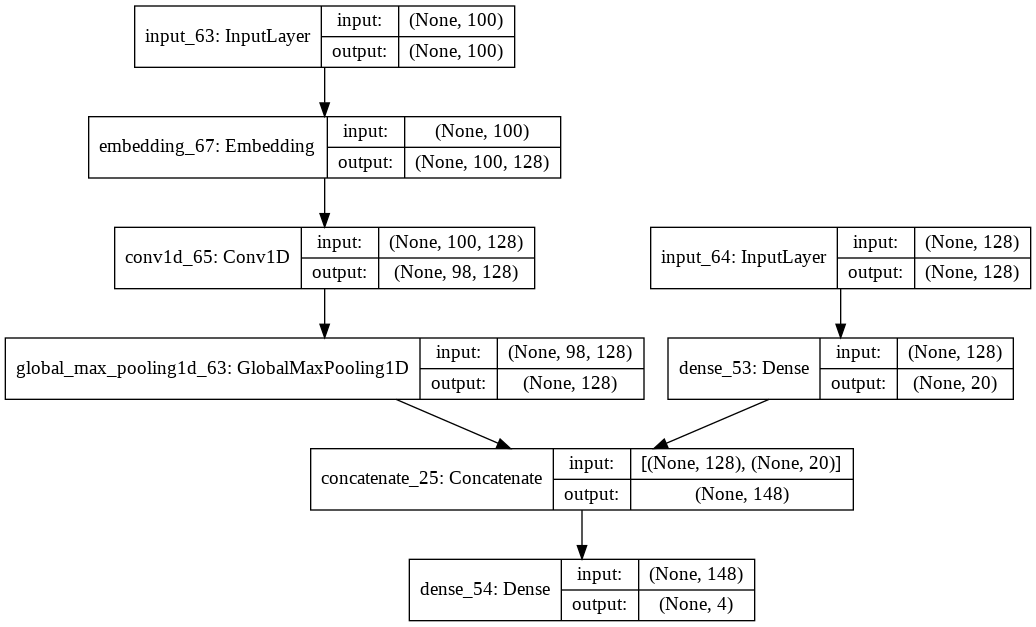

In [ ]:
embbeding = graph2vec.get_embedding()
from keras.models import Sequential, Model
from keras import layers
import math
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau



def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.8
   epochs_drop = 2
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate


embedding_dim = 128
## NLP processing
input_nlp = layers.Input(shape = (maxlen,))
word_embedding_layer = layers.Embedding(vocab_size,
                           embedding_dim,
                           #weights=[embeddings_matrix],
                           #trainable=True,
                           #input_length=maxlen
                           )(input_nlp)
conv_layer = layers.Conv1D(128, 3, activation='tanh')(word_embedding_layer)
maxpooling_layer = layers.GlobalMaxPooling1D()(conv_layer)
#dense_layer = layers.Dense(10, activation='tanh')(maxpooling_layer)
##graph processing
input_graph = layers.Input(shape=(128,))
dense_graph_layer = layers.Dense(20, activation='tanh')(input_graph)
#dense2_graph_layer = layers.Dense(20, activation = 'tanh')(input_graph)

add_layers = layers.Concatenate()([maxpooling_layer, dense_graph_layer])
#dense_final = layers.Dense(10, activation = 'tanh')(add_layers)
#dropout = layers.Dropout(0.3)(dense_final)
out_layer = layers.Dense(n_classes, activation='softmax')(add_layers)


model = Model (inputs = [input_nlp, input_graph], outputs = out_layer)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

checkpoint = ModelCheckpoint(filepath='final_model.h5', 
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.01),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
lr_scheduler = LearningRateScheduler(step_decay)


callbacks = [checkpoint]

model.fit([X_train, graph2vec.get_embedding()], y_train, verbose=1, epochs=50, validation_split=0.10, callbacks=callbacks)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from keras.models import load_model
model = load_model('/content/final_model.h5')

test_graphs_path = join(root_path, 'test')
_, _, sequences_of_nodes_test = get_graphs(test_graphs_path, '/content/test_graph2vec', train=False)
X_test_graph = pad_sequences(sequences_of_nodes_test, padding='post', maxlen=maxlen_sequences)


id_files = [int(i.replace('.txt', '')) for i in listdir(test_graphs_path)]
test_df = pd.DataFrame({'id': id_files})
test_df = pd.merge(test_df, df_test_tweets, on='id', how='inner')

test_tweets = clear_text(test_df)
X_test = tokenizer.texts_to_sequences(test_tweets)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# graph2vec_test = Graph2Vec(wl_iterations=2,
#                       attributed=False,
#                       dimensions=128,
#                       workers=8,
#                       down_sampling=0.001,
#                       epochs=10,
#                       learning_rate=0.01,
#                       min_count=5,
#                        seed=0)
# graph2vec_test.fit(test_graphs)
y_test = model.predict([X_test, X_test_graph])

y_test = y_test.argmax(axis=-1)

inv_labels = {v: k for k, v in labels.items()}

data_kaggle = pd.DataFrame({'label':y_test, 'id': test_df.id})
data_kaggle['label'] = data_kaggle['label'].replace(inv_labels)
data_kaggle.to_csv('test_prediction.csv', index=False)
data_kaggle 

,label,id
0,non-rumor,525285199530455040
1,unverified,650975967146602496
2,true,407167928313081856
3,false,527138218505175040
4,false,495366618818830336
...,...,...
208,false,641430951403343872
209,true,407159686786732032
210,non-rumor,692004901455556608
211,false,532281981795848192


## Predict Test Data

In [ ]:
from keras.models import load_model

model = load_model('/content/final_model.h5')
y_test = model.predict(X_test)
y_test = y_test.argmax(axis=-1)

inv_labels = {v: k for k, v in labels.items()}

data_kaggle = pd.DataFrame({'label':y_test, 'id': df_test_tweets.id})
data_kaggle['label'] = data_kaggle['label'].replace(inv_labels)
data_kaggle.to_csv('test_prediction.csv', index=False)
data_kaggle 

,label,id
0,non-rumor,689719109785907200
1,unverified,531300385248800768
2,false,652992524504600576
3,true,509473920060104704
4,false,651321040119963648
...,...,...
208,unverified,642432477185867776
209,non-rumor,693236688538243074
210,true,504131150429061121
211,non-rumor,692004901455556608
